# Linear Regression
Vamos a simular el proceso de aprendizaje de una regresión lineal para ver cómo esta trabaja.

<b>Paso 0.</b> Importamos las librerías.

In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

<b>Paso 1.</b> Cargamos los datos del fichero.

In [2]:
print(os.getcwd()) # Ruta del directorio de trabajo actual

C:\Users\Monica\Desktop\EAE Master\Data Science & Advanced Analytics\Advanced Analytics\Practica 4


<b>Paso 2.</b> Comprobamos que los datos se han cargado correctamente.

In [3]:
FILE_PATH = 'C:/Users/Monica/Desktop/EAE Master/Data Science & Advanced Analytics/Advanced Analytics/Practica 4/'
FILE_NAME = 'weight-height.csv'
df = pd.read_csv(FILE_PATH + FILE_NAME, sep=',')
#type(df)

df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


<b>Paso 3.</b> Representamos en una gráfica de dispersión de puntos los datos de la altura y peso que hemos importados. Para agilizar el proceso, directamente podemos hacer uso del método plot() que incorpora Pandas.

<AxesSubplot:xlabel='Weight', ylabel='Height'>

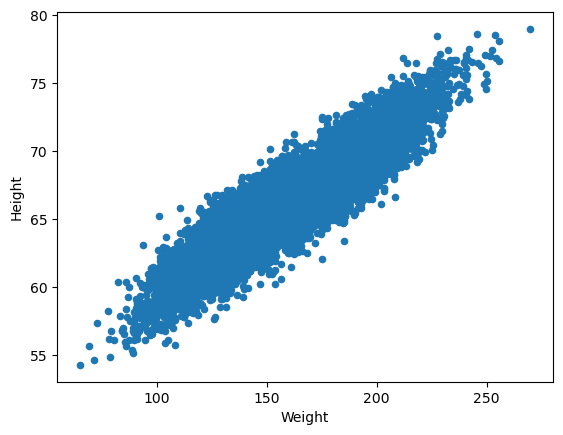

In [4]:
#Con la función de gráfico plot.scatter, tomamos el array de X como el array de Y. Con esto graficamos los diferentes puntos
#en los ejes X y X
df.plot.scatter(x='Weight', y='Height')

<b>Paso 4.</b> Representamos una línea recta cualquiera sobre el gráfico.
Para ello, podemos hacer uso de la función pyplot de la librería (por convención, en el momento de la importación se le suele dar el alias de "plt").

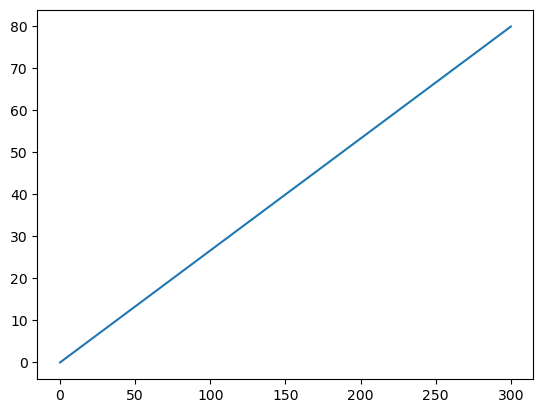

In [5]:
#Planteamis los limines de 300 para el eje X, como tambien 80 para el eje de las Y tomando en cuenta los valores maximos
#de las variables Weight y Height
x1 = [0, 300]
y1 = [0, 80] 
linea = plt.plot(x1,y1)
plt.show()

<b>Paso 5.</b> ¿Podemos ajustar la pendiente de esta línea recta para que atraviese por la mitad la nube de puntos sobre el gráfico?

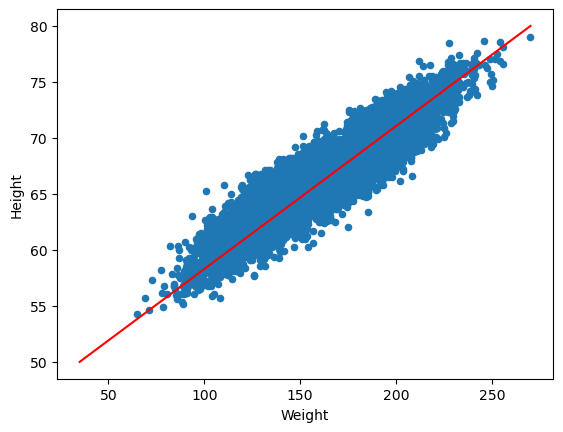

In [6]:
#Aqui se realizó el ajuste primeramente tomando en cuenta las variables X y Y de nuestra data para poder pintar los puntos 
#con plot.scatter, posteriormente asjutamos la linea recta que cruce los puntos del gráfico, tomando como referencia 
#un ajuste manual de X y Y con pruebas de los puntos para lograr hacer que la pendiente pueda atravesar los puntos marcados.

df.plot.scatter(x='Weight', y='Height')
plt.plot([35, 270], [50, 80], color='r')
plt.show()

<b>Paso 6. </b> Definimos una función de regresión lineal con el nombre de funcion_lineal. <br>
<i> Esta tiene que tener 3 parámetros de entrada: x(altura), w(peso), b(bias). Por defecto, vamos a asignar a los parámetros w y b el valor 0.

In [23]:
def funcion_lineal(x, w=0, b=0):
    y_pred = w * x + b
    return y_pred

prediccion = funcion_lineal(df["Height"], 0, 0)
print(prediccion)
#con la funcion linear hacemos una prueba con los datos de x de nuestro dataframe para hacer pruebas iniciales de la funcion

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
9995    0.0
9996    0.0
9997    0.0
9998    0.0
9999    0.0
Name: Height, Length: 10000, dtype: float64


<b>Paso 7.</b> Extraemos los valores de la columna "Height" en un array de Numpy y lanzamos la función que hemos creado pasándole el array de valores de altura. El array resultante tendrá las predicciones de peso habiendo usado los parámetros w=0 y b=0.

In [8]:
#Inicialmente obtenemos el array de alturas y las guardamos en la variable altura
x_altura = df["Height"].to_numpy()
x_altura 

array([73.84701702, 68.78190405, 74.11010539, ..., 63.86799221,
       69.03424313, 61.94424588])

In [24]:
#Inicialmente obtenemos el array de alturas y las guardamos en la variable altura
prediccion_regresion_lineal_peso = funcion_lineal(x_altura,0,0)
print(prediccion_regresion_lineal_peso)

[0. 0. 0. ... 0. 0. 0.]


<b>Paso 8.</b> Mostramos en una gráfica los resultados habiendo usado w=0 y b=0.

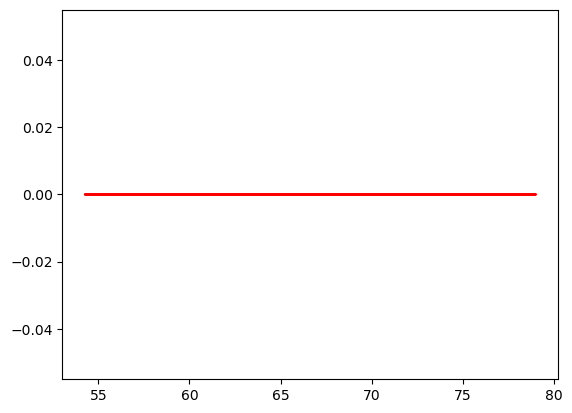

In [10]:
#graficamos la linea recta con el array de altura y la regresion_lineal_peso que se conoce como la prediccion para graficar la linea recta
plt.plot(x_altura, prediccion_regresion_lineal_peso, color='r')
plt.show()

<b>Paso 8b.</b> Comparamos en una gráfica el valor de la "y" real contra la "y" predicha.

In [ ]:
y = df["Height"]

plt.figure(figsize=(5,5)) # Medidas ede la figura en pulgadas

<b>Paso 9.</b> Dibujamos la función resultante con w=2 y b=50

[197.69403404 187.56380809 198.22021078 ... 177.73598443 188.06848626
 173.88849176]


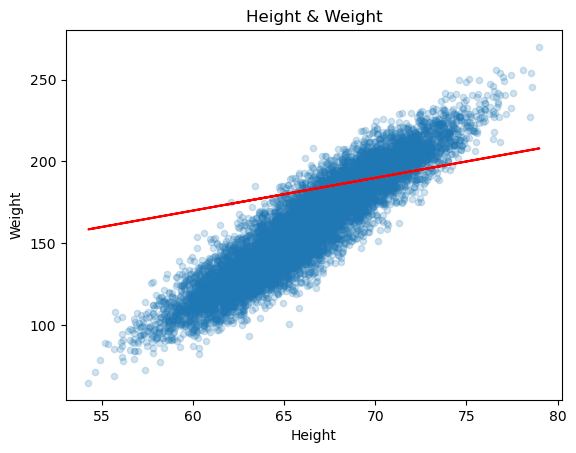

In [25]:
prediccion_peso = funcion_lineal(x_altura, 2, 50)
print(prediccion_peso)
df.plot(
    kind="scatter",
    y="Weight",
    x="Height",
    title="Height & Weight",
    alpha=0.2
)

plt.plot(x_altura, prediccion_peso, color="red")

<b>Paso 10.</b> Ajusta los parámetros de la función hasta hacer converger la línea resultante con la masa de puntos azules.

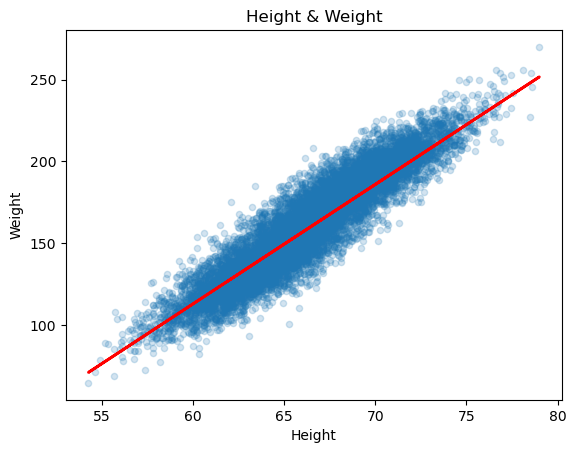

In [26]:
y_pred = funcion_lineal(x_altura, 7.3, -325)

df.plot(
    kind="scatter",
    y="Weight",
    x="Height",
    title="Height & Weight",
    alpha=0.2
)
plt.plot(x_altura, y_pred, color="red", linewidth=2)

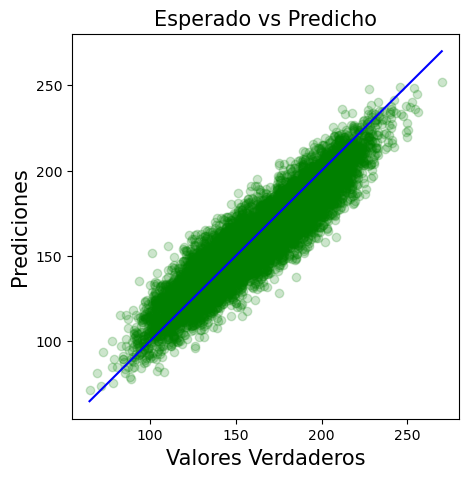

In [18]:
plt.figure(figsize=(5,5))

plt.scatter(y, y_pred, c="green", alpha=0.2)
plt.xlabel("Valores Verdaderos", fontsize=15)
plt.ylabel("Prediciones", fontsize=15)
plt.title("Esperado vs Predicho", fontsize=15)

posicion_1 = max(max(y_pred), max(y))
posicion_2 = min(min(y_pred), min(y))
plt.plot([posicion_1, posicion_2], [posicion_1, posicion_2], "b")

plt.show()

### Cost Function

<b>Paso 0.</b> Creamos una función que calcule el error cuadrático medio (Mean Squared Error).

In [19]:
def calculo_mse(y_true, y_pred):
    error = abs(y_true - y_pred) ** 2
    error = error.mean()
    return error

<b>Paso 1.</b> Definimos dos variables que sean: "x" con alturas leídas del fichero y "y_true" con los correspondientes pesos.

In [20]:
x = df["Height"].values
y_true = df["Weight"].values

<b>Paso 2.</b> Calculamos predicción usando nuestra función con los parámetros por defecto (w=0 y b=0) y almacenamos el output en una variable que se llame "y_pred".

In [27]:
y_pred = funcion_lineal(x)

<b>Paso 3.</b> Calculamos el error para las predicciones que acabamos de realizar.

In [28]:
error = calculo_mse(y_true, y_pred)
error

27093.83757456157

<b>Paso 4.</b> Probamos 10 valores distintos de "w". Mostramos en un mismo gráfico los resultados para los 10 modelos y también graficamos los resultados de la función de coste.

In [29]:
w_values_list = [1.5, 1.75, 2, 2.25, 2.5, 2.75, 3, 3.25, 3.5, 3.75]
error_list = []

In [30]:
for i in range(len(w_values_list)):
    y_pred = funcion_lineal(x, w_values_list[i])
    error = calculo_mse(y_true, y_pred)
    error_list.append(error)
    print(f"El error para w = {str(w_values_list[i])} y b = 0 es: {round(error, 2)}")

El error para w = 1.5 y b = 0 es: 4551.71
El error para w = 1.75 y b = 0 es: 2728.2
El error para w = 2 y b = 0 es: 1457.12
El error para w = 2.25 y b = 0 es: 738.48
El error para w = 2.5 y b = 0 es: 572.26
El error para w = 2.75 y b = 0 es: 958.48
El error para w = 3 y b = 0 es: 1897.13
El error para w = 3.25 y b = 0 es: 3388.21
El error para w = 3.5 y b = 0 es: 5431.72
El error para w = 3.75 y b = 0 es: 8027.67


Text(0, 0.5, 'Error MSE')

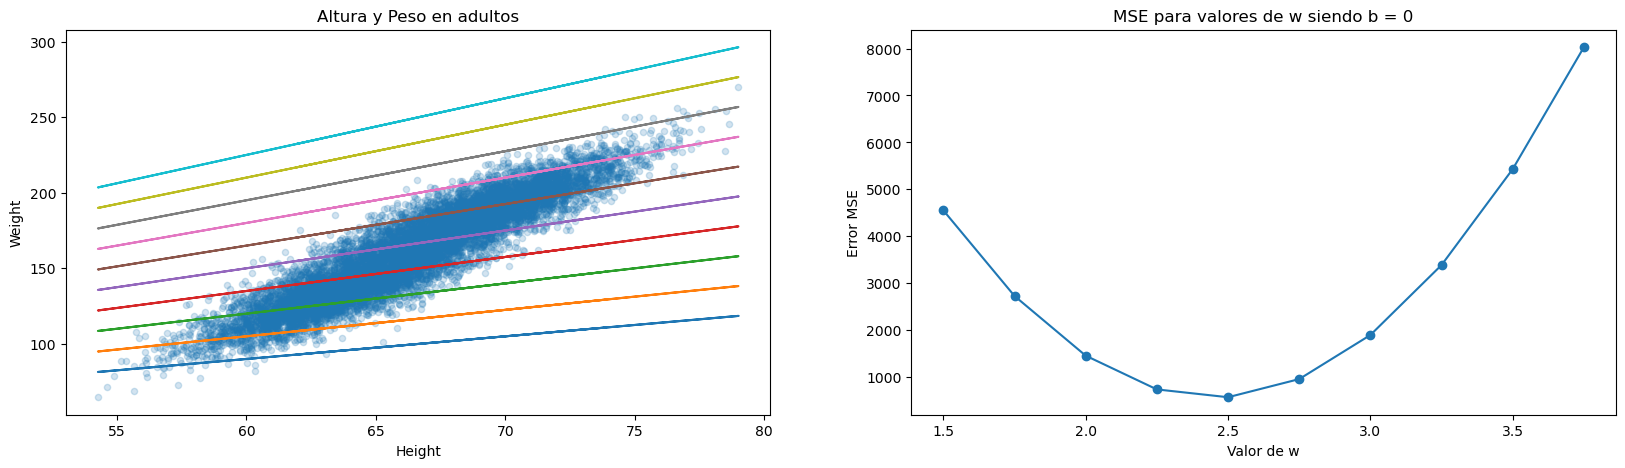

In [31]:
# Creamos una figura de 20 de ancho y 5 de largo.
plt.figure(figsize=(20, 5))

# Vamos a representar 2 gráficos en la misma figura
# Primer plot:
ax1 = plt.subplot(1, 2, 1) # Nº filas totales de la figura, nº columnas totales y posición subplot 1.

df.plot(
    kind="scatter",
    x="Height",
    y="Weight",
    title="Altura y Peso en adultos",
    alpha=0.2,
    ax=ax1 # En el primer plot ax1 representamos los datos del dataframe.
)

for i in range(len(w_values_list)):
    y_pred = funcion_lineal(x, w_values_list[i])    
    ax1.plot(x, y_pred) # Ploteamos las distintas líneas de y_pred.

# Segundo plot:
ax2 = plt.subplot(1, 2, 2) # Nº filas totales de la figura, nº columnas totales y posición subplot 2.
ax2.plot(w_values_list, error_list, "o-") # Ploteamos la función de coste. Para cada w su MSE (con puntos "o" y línea sólida "-").
plt.title("MSE para valores de w siendo b = 0")
plt.xlabel("Valor de w")
plt.ylabel("Error MSE")

<b>Paso 5.</b> Nos quedamos con el mejor rendimiento de "w" y probamos 10 distintos valores de "b". De nuevo representamos los resultados y su respectiva función de coste.

In [32]:
b_values_list = [-300, -250, -200, -150, -100, -50, 0, 50, 100, 150]
error_list = []

In [33]:
for i in range(len(b_values_list)):
    y_pred = funcion_lineal(x, 2.5, b_values_list[i])
    error = calculo_mse(y_true, y_pred)
    error_list.append(error)
    print(f"El error para w =  y b = {str(b_values_list[i])} es: {round(error, 2)}")

El error para w =  y b = -300 es: 87885.14
El error para w =  y b = -250 es: 60832.99
El error para w =  y b = -200 es: 38780.85
El error para w =  y b = -150 es: 21728.7
El error para w =  y b = -100 es: 9676.55
El error para w =  y b = -50 es: 2624.41
El error para w =  y b = 0 es: 572.26
El error para w =  y b = 50 es: 3520.12
El error para w =  y b = 100 es: 11467.97
El error para w =  y b = 150 es: 24415.83


Text(0, 0.5, 'Error MSE')

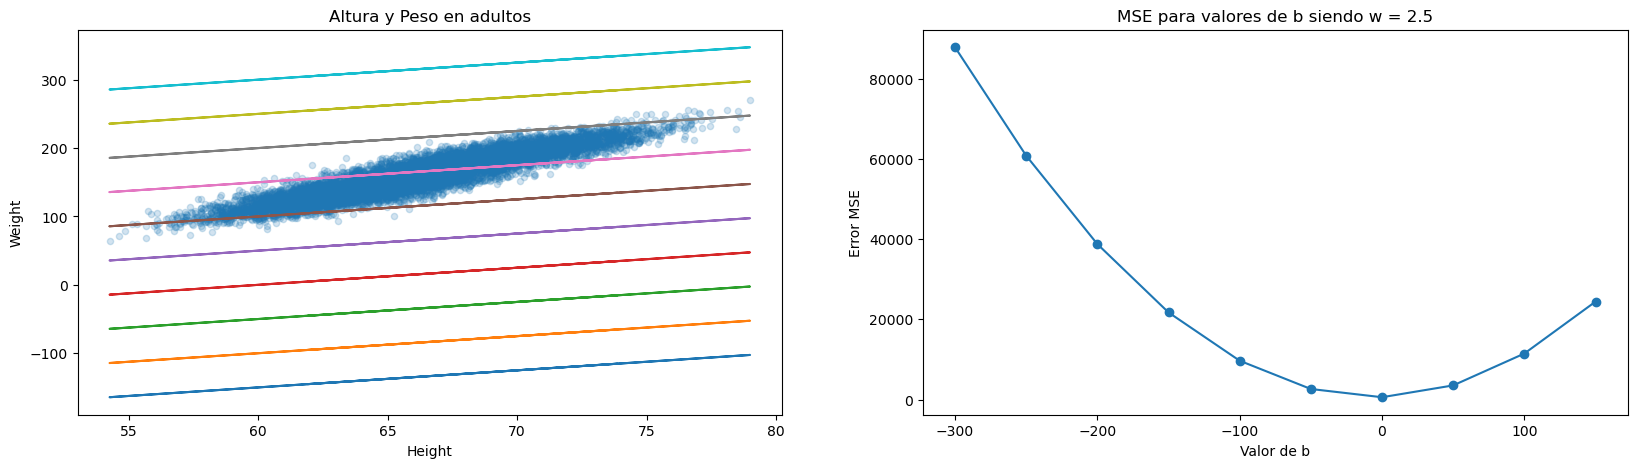

In [35]:
plt.figure(figsize=(20, 5))

ax1 = plt.subplot(1, 2, 1)

df.plot(
    kind="scatter",
    x="Height",
    y="Weight",
    title="Altura y Peso en adultos",
    alpha=0.2,
    ax=ax1
)

for b in b_values_list:
    y_pred = funcion_lineal(x, w=2.5, b=b)
    ax1.plot(x, y_pred)

ax2 = plt.subplot(1, 2, 2)
ax2.plot(b_values_list, error_list, "o-")
plt.title("MSE para valores de b siendo w = 2.5")
plt.xlabel("Valor de b")
plt.ylabel("Error MSE")